## Load the dataset


Import the required libraries.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [71]:
plt.style.use('ggplot')

In [72]:
#The dataset is available on the IBM Cloud at the below url.
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [73]:
#Load the data available at dataset_url into a dataframe.
df=pd.read_csv(dataset_url)

## Explore the data set


In [74]:
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

In [75]:
#Number of rows and column in Dataframe
df.shape

(11552, 85)

In [76]:
#Lets see the datatype of each column
df.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [77]:
#Lets see how many unique in 'Country' column
no_country=len(df['Country'].unique())
print("There are {} Country".format(no_country))

There are 135 Country


## Finding duplicates


In [78]:
# Count duplicate in a DataFrame
df.duplicated().sum()

154

In [79]:
columns=['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase']

In [80]:
# Count duplicate on certain columns
df.duplicated(subset=columns).sum()

154

In [81]:
# dropping ALL duplicte values
df.drop_duplicates(subset =columns,
                     keep = False, inplace = True)

In [82]:
# Lets check once to Count duplicate on certain columns
df.duplicated(subset=columns).sum()

0

In [83]:
#What is the median of the column ConvertedComp?
df['ConvertedComp'].median()

57756.0

## Finding Missing values


In [84]:
#Find the missing values for all columns
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       539
Ethnicity       670
Dependents      138
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

In [85]:
#count the  missing in the column 'WorkLoc'
df['WorkLoc'].isnull().sum()

32

In [86]:
#Identify the value that is most frequent (majority) in the WorkLoc column.
df['WorkLoc'].value_counts()


Office                                            6747
Home                                              3559
Other place, such as a coworking space or cafe     967
Name: WorkLoc, dtype: int64

In [87]:
#Replacing NAN with most frequent value in WorkLoc
df['WorkLoc']=df['WorkLoc'].replace(np.nan,'Office')
df['WorkLoc'].isnull().sum()

0

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


In [88]:
df['CompFreq'].value_counts()

Yearly     6018
Monthly    4753
Weekly      328
Name: CompFreq, dtype: int64

In [89]:
#Create a new column named 'NormalizedAnnualCompensation
df.loc[df['CompFreq'] == "Yearly", 'NormalizedAnnualCompensation'] = df['CompTotal']
df.loc[df['CompFreq'] == "Monthly", 'NormalizedAnnualCompensation'] = df['CompTotal']*12
df.loc[df['CompFreq'] == "Weekly", 'NormalizedAnnualCompensation'] = df['CompTotal']*52

In [90]:
df['NormalizedAnnualCompensation'].mean()

6174911.779111873

# **Exploratory Data Analysis**


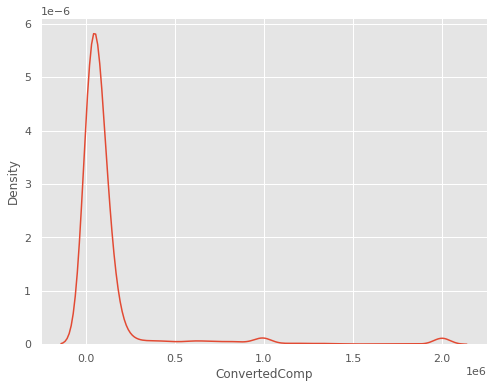

In [91]:
#distribution curve for the column ConvertedComp.
plt.subplots(figsize=(8,6))
sns.set_theme()
sns.set(style="darkgrid")
sns.kdeplot(df['ConvertedComp'])
plt.show()

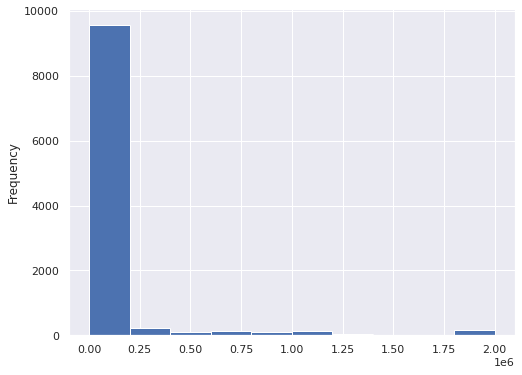

In [92]:
 #histogram for the column ConvertedComp
 plt.subplots(figsize=(8,6))
 df['ConvertedComp'].plot(kind='hist')

In [93]:
#What is the median of the column ConvertedComp?
df['ConvertedComp'].median()

57756.0

In [94]:
df['Gender'].value_counts()

Man                                                            10391
Woman                                                            728
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [95]:
#summary of column Age
df['Age'].describe()

count    11023.000000
mean        30.783208
std          7.396169
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

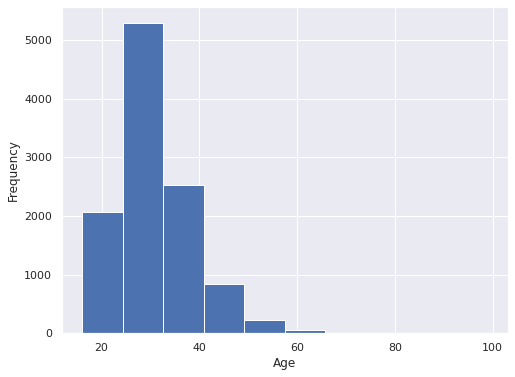

In [96]:
# histogram of the column Age
plt.subplots(figsize=(8,6))
df['Age'].plot(kind='hist')
plt.xlabel("Age")

## Outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


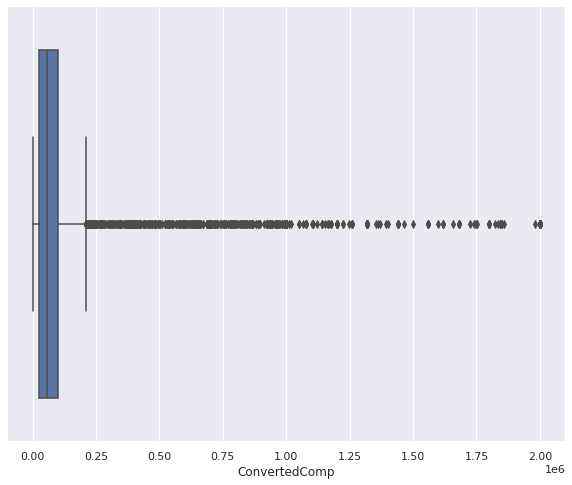

In [97]:
#Finding  if outliers exist in the column ConvertedComp using a box plot
plt.subplots(figsize=(10,8))
sns.boxplot(df['ConvertedComp'])

In [98]:
df1=df[['ConvertedComp']]

In [99]:
df1.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


In [100]:
Q1 = df1['ConvertedComp'].quantile(0.25)
Q3 = df1['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

In [101]:
# Inter Quartile Range for the column ConvertedComp.
IQR

72988.0

In [102]:
#upper and lower bounds.
lower_bounds=Q1 - 1.5 * IQR
upper_bounds=Q3 + 1.5 * IQR
print('Lower bounds is:{} and Upper bounds is:{}'.format(lower_bounds,upper_bounds))

Lower bounds is:-82470.0 and Upper bounds is:209482.0


In [103]:
#removing outlier from column"ConvertedComp"
df1 = df1[~((df1['ConvertedComp'] < (Q1 - 1.5 * IQR)) |(df1['ConvertedComp'] > (Q3 + 1.5 * IQR)))]

In [104]:
#no of outlier in column'ConvertedComp'
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()

ConvertedComp    0
dtype: int64

In [105]:
df['ConvertedComp']=df1['ConvertedComp']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


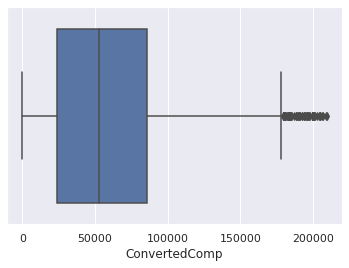

In [106]:
sns.boxplot(df['ConvertedComp'])

Note:I have remove outlier,so now ConvertedComp is free from outlier

In [107]:
#What is the median of the column ConvertedComp?
df['ConvertedComp'].median()

52704.0

In [108]:
#What is the median of the column ConvertedComp?
df['ConvertedComp'].mean()

59896.65415800416

In [109]:
print("Minimum age from dataset is",df['Age'].min())
print("Maximum age from dataset is",df['Age'].max())

Minimum age from dataset is 16.0
Maximum age from dataset is 99.0


## Correlation


In [110]:
Age_corr=df[['Age','Respondent','CompTotal','ConvertedComp','WorkWeekHrs','CodeRevHrs','NormalizedAnnualCompensation']].corr()
Age_corr

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,NormalizedAnnualCompensation
Age,1.000000,0.003341,0.006923,0.401840,0.036354,-0.021596,-0.005314
Respondent,0.003341,1.000000,-0.014188,0.010502,-0.015759,0.001442,-0.000060
CompTotal,0.006923,-0.014188,1.000000,-0.063720,0.003503,0.006898,0.863226
ConvertedComp,0.401840,0.010502,-0.063720,1.000000,0.034362,-0.089623,-0.086486
WorkWeekHrs,0.036354,-0.015759,0.003503,0.034362,1.000000,0.026311,0.005523
CodeRevHrs,-0.021596,0.001442,0.006898,-0.089623,0.026311,1.000000,0.012670
NormalizedAnnualCompensation,-0.005314,-0.000060,0.863226,-0.086486,0.005523,0.012670,1.000000


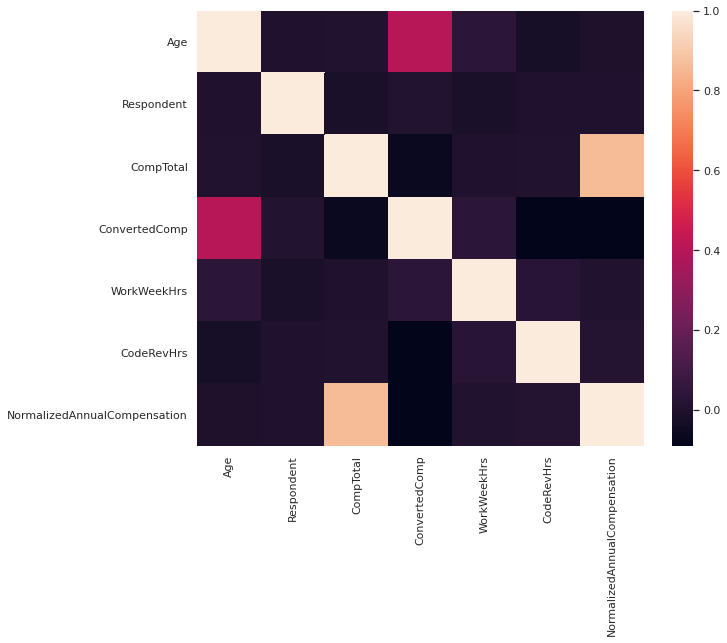

In [111]:
plt.subplots(figsize=(10,8))
sns.heatmap(Age_corr)

## Visualizing distribution of data


### 1.Plot a histogram of 'ConvertedComp'

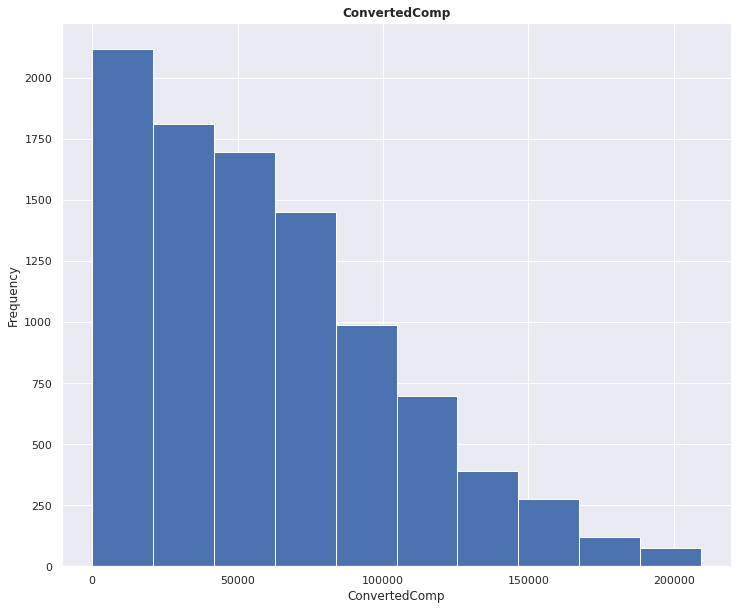

In [112]:
#Plot a histogram of `ConvertedComp.
plt.subplots(figsize=(12,10))
plt.xlabel("ConvertedComp")
plt.title("ConvertedComp" ,fontweight='bold')
df1['ConvertedComp'].plot(kind='hist')

### 2.Plot a Boxplot of 'Age'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


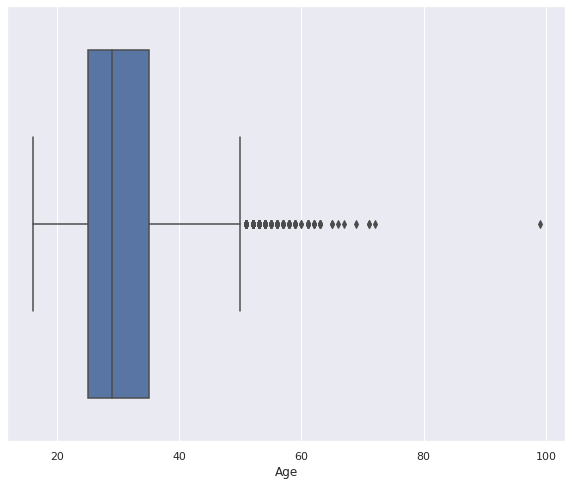

In [113]:

#Plot a box plot of `Age.
plt.figure(figsize=(10,8))
sns.boxplot(df['Age'])


### 3.Create a Scatter plot of Age and WorkWeekHrs

Text(0, 0.5, 'WorkWeekHrs')

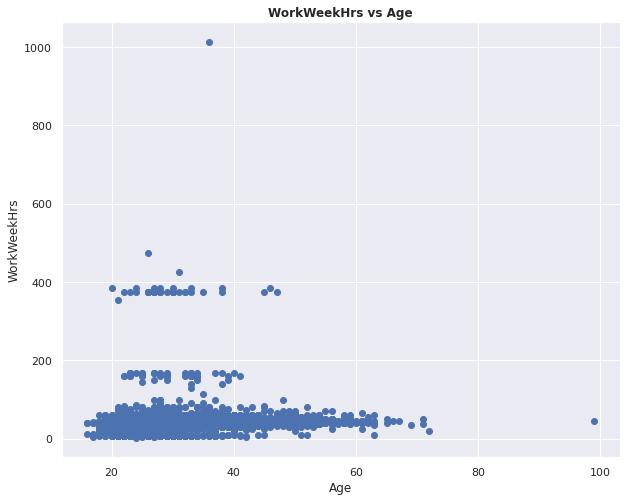

In [114]:
#Create a scatter plot of Age and WorkWeekHrs
plt.subplots(figsize=(10,8))
plt.scatter(x=df['Age'] ,y=df['WorkWeekHrs'])
plt.title("WorkWeekHrs vs Age" ,fontweight='bold')
plt.xlabel("Age")
plt.ylabel("WorkWeekHrs")

### 3.Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size

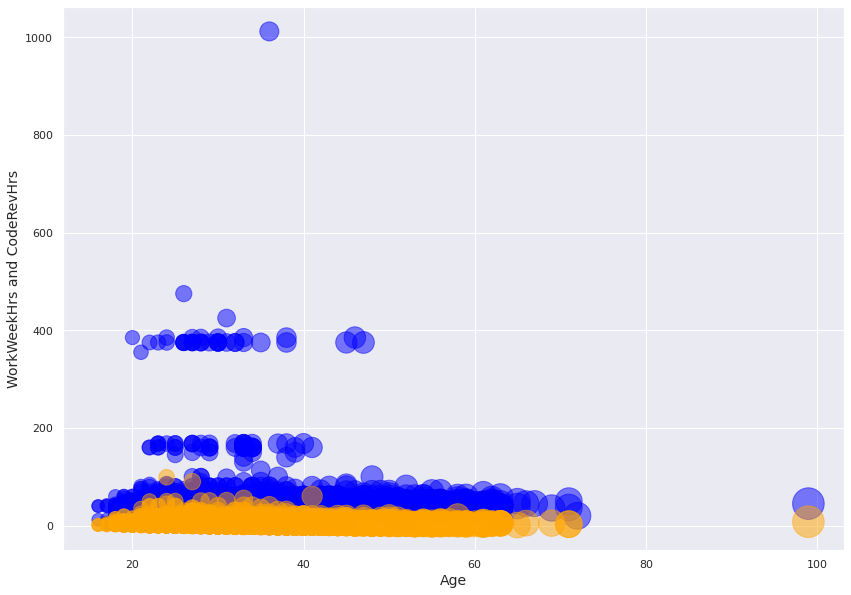

In [115]:
#Create a bubble plot of WorkWeekHrs and CodeRevHrs, use Age column as bubble size
Normalized_age=df['Age']/df['Age'].max()
plt.subplots(figsize=(14,10))
# use the scatter function
plt.scatter(df['Age'],df['WorkWeekHrs'], s=Normalized_age *1000, alpha=0.5 ,color='blue')
plt.scatter(df['Age'],df['CodeRevHrs'], s=Normalized_age *1000, alpha=0.5 ,color='orange')

plt.xlabel("Age" ,size=14)
plt.ylabel("WorkWeekHrs and CodeRevHrs", size=14)

# show the graph
plt.show()

### Data Visualization

 ### 1.Pie Chart of the Top5 Desire database for Next Year

In [118]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [141]:
databaseDesire=df['DatabaseDesireNextYear']
databaseDesire.dropna(axis=0,inplace=True)


In [142]:
databaseDesire.isnull().sum()

0

In [143]:
from collections import Counter

In [144]:
language_counter=Counter()

for response in databaseDesire:
  language_counter.update(response.split(';'))

language=[]
popularity=[]

for item in language_counter.most_common(15):
  language.append(item[0])
  popularity.append(item[1])


In [145]:
df1=pd.DataFrame({'Language':language,'Popularity':popularity})
df1.sort_values(by=['Popularity'], axis=0, ascending=False, inplace=True)
Top5_Desire_Database=df1.head()


In [146]:
Top5_Desire_Database

,Language,Popularity
0,PostgreSQL,4294
1,MongoDB,3617
2,Redis,3301
3,MySQL,3253
4,Elasticsearch,2832


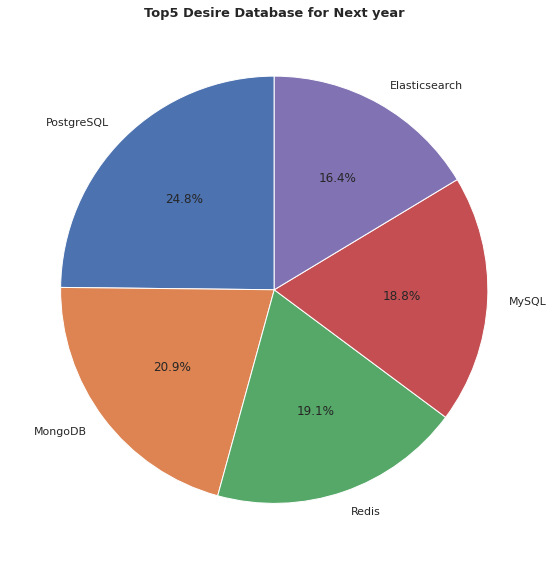

In [147]:
explode = [0, 0, 0, 0, 0]
plt.subplots(figsize=(14,8))
plt.pie(Top5_Desire_Database['Popularity'], labels=Top5_Desire_Database['Language'], explode=explode, shadow=False,
        startangle=90, autopct='%1.1f%%')

plt.title("Top5 Desire Database for Next year" ,fontsize=13 ,fontweight="bold")
plt.tight_layout()
plt.savefig("Top5 Desire Database for Next Year",bbox_inches='tight',dpi=400)
plt.show()


### 2.Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.

In [200]:
agework=df[['Age','WorkWeekHrs','CodeRevHrs']]

age_filter= agework [(agework["Age"]>= 30 )&(agework["Age"]<=35)] 
median_weekhrs= age_filter["WorkWeekHrs"].median()
median_coderev= age_filter["CodeRevHrs"].median()

age_filter.head()

,Age,WorkWeekHrs,CodeRevHrs
5,31.0,8.0,3.0
11,34.0,40.0,2.0
12,32.0,40.0,2.0
18,34.0,42.0,15.0
22,33.0,40.0,2.0


Text(0.5, 1.0, 'Median hours, by age')

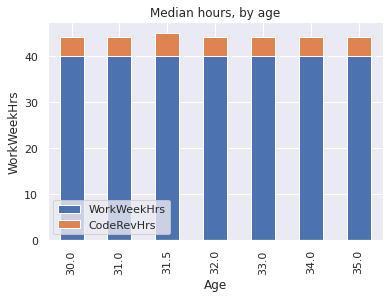

In [201]:
order = ['WorkWeekHrs', 'CodeRevHrs']
age_filter.groupby('Age')[order].median().plot.bar(stacked=True)
plt.ylabel("WorkWeekHrs")
plt.title('Median hours, by age')

### 3.Plot the median ConvertedComp for all ages from 45 to 60.

In [204]:
agework=df[['Age','ConvertedComp']]

age_filter1= agework[(agework['Age']>=45) & (agework['Age']<=60)]
median_ConvertedComp= age_filter1["ConvertedComp"].median()
age_filter1.head()

,Age,ConvertedComp
7,47.0,103000.0
50,54.0,NaN
66,47.0,54996.0
75,47.0,62807.0
93,45.0,72522.0


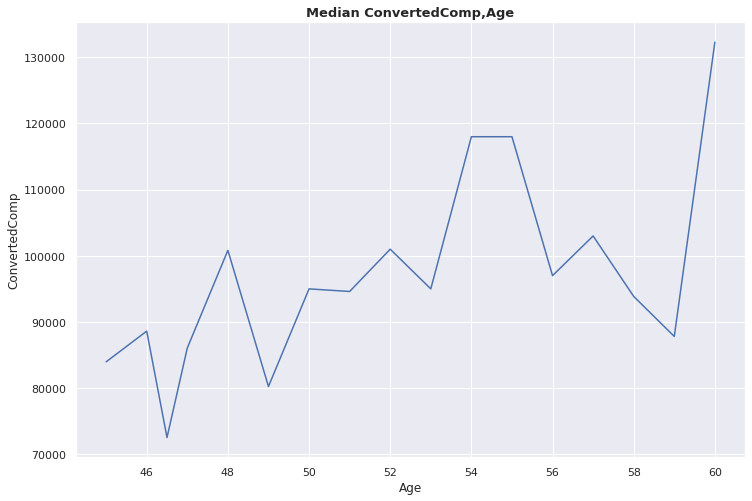

In [207]:
plt.subplots(figsize=(12,8))
age_filter1.groupby('Age')['ConvertedComp'].median().plot()
plt.title("Median ConvertedComp,Age" ,fontsize=13 ,fontweight="bold")
plt.xlabel('Age')
plt.ylabel('ConvertedComp')
plt.show()



### 4Create a horizontal bar chart using column MainBranch

In [192]:
df['MainBranch'].value_counts()


I am a developer by profession                                                   10534
I am not primarily a developer, but I write code sometimes as part of my work      771
Name: MainBranch, dtype: int64

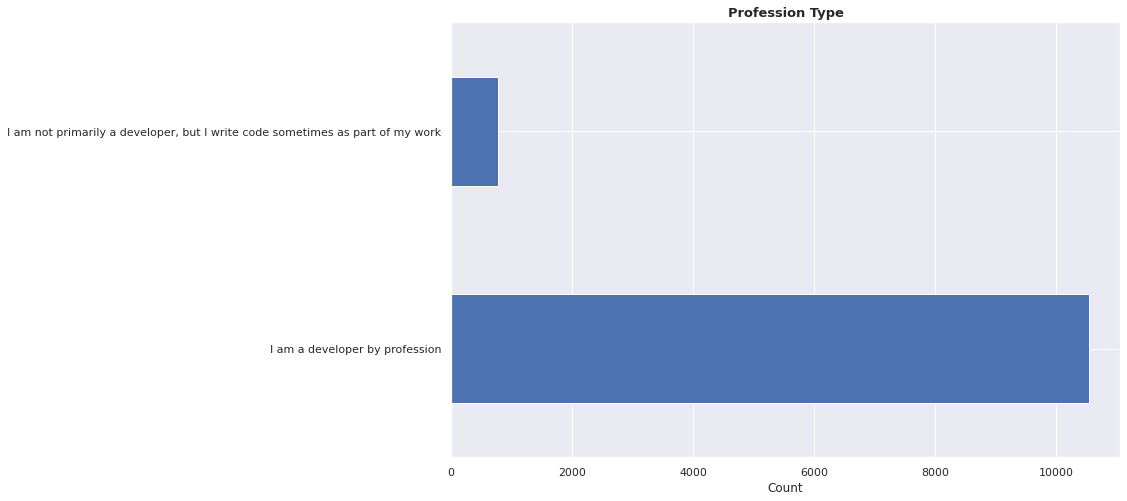

In [208]:
plt.subplots(figsize=(12,8))
df['MainBranch'].value_counts().plot(kind='barh')
plt.title("Profession Type" ,fontsize=13 ,fontweight="bold")
plt.xlabel('Count')
plt.show()